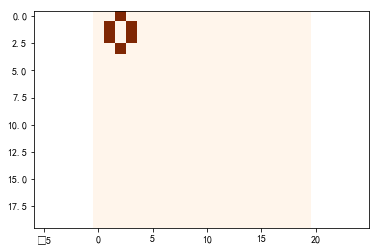

KeyboardInterrupt: 

In [12]:
import numpy as np
import pygame
import matplotlib.pyplot as plt
from IPython import display

class gamelife:

    def __init__(self,x_dot,y_dot,dot_px=10):
        self.x_dot = x_dot
        self.y_dot = y_dot
        self.dot_px = dot_px
        self.source_a = np.random.randint(0,2,(self.x_dot,self.y_dot))
        self.copy_a = np.copy(self.source_a)


    def has_counts(self,x, y):
        """
        传入一个具体的坐标，判断周围有几个“生命”
        0表示空白，1表示生命
        :param x:       x-1,y-1  x-1,y  x-1,y+1
                        x,y-1    x,y    x,y+1
                        x+1,y-1  x+1,y  x+1,y+1
        :param y:
        :return: 周围存活细胞的个数
        """
        count_num = 0
        for i in (x-1,x,x+1):
            for j in (y-1, y, y+1):
                if i == x and j == y:
                    continue
                if i < 0 or j < 0 or i >= self.x_dot or j >= self.y_dot:
                    continue
                if self.source_a[i][j] == 1:
                    count_num += 1
        #print('第一个方法', count_num)
        return count_num


    def live_or_die(self,life_counts,x,y):
        '''
        此函数为判断函数，通过周围存活细胞个数判断此细胞是否存活
        :param life_counts: 某个坐标周围存活的细胞个数
        :return: 返回该细胞是否存活
        '''
        if life_counts == 3:
            return 1
        if life_counts > 3 or life_counts < 2:
            return 0
        if life_counts == 2:
            return self.source_a[x,y]


    def next_array(self,copy_a):
        '''
        输入一个数组，通过调用之前的方法，来生成一个新的数组
        :param source_a:输入一个数组
        :return:生成一个新的数组
        '''
        #copy_a = np.copy(source_a)
        for x in range(self.x_dot):
            for y in range(self.y_dot):
                copy_a[x,y] = self.live_or_die(self.has_counts(x,y),x,y)
        return copy_a

    def mainplt(self):
        '''
        用plt.imshow()方法画出gameoflife
        :return:
        # data = np.random.randint(0,2,(10,10))
        # print(data)
        map = plt.imshow(data,interpolation = 'nearest',
                cmap = cmap,aspect = 'auto',vmin = 0,vmax = 1)
        #interpolation 差值 vmin最小值 白色
        '''
        fig = plt.figure(figsize=(8, 8))    #创建画布，且使画布大小为10*10
        fig.add_subplot(111)         #在此画布上添加子图
        plt.rcParams['font.sans-serif'] = 'SimHei'      #设置黑体字
        from matplotlib import cm  # colormap            #导入colormap
        cmap = cm.Oranges        #橘色系
        plt.title('生命游戏与matplotlib')    #设置子图标题
        running = True
        # plt.ion()     #打开交互模式
        while running:
            #用plt.imshow()方法画出DataFrame，interpolation 差值(最近的) vmin最小值 白色
            map = plt.imshow(self.source_a, interpolation='nearest',
                                cmap=cmap, aspect='auto', vmin=0, vmax=1)
            plt.axis('equal')
            # self.copy_a = np.random.randint(0,1,(self.x_dot,self.y_dot))
            self.copy_a = self.next_array(self.copy_a)    #调用next_array()方法来计算下一个数组
            display.clear_output(wait = True)
            plt.pause(0.5)     #间歇时间0.5s
            self.source_a = np.copy(self.copy_a)
            plt.clf()    #清空画布
        plt.ioff()     #关闭交互模式


    def mainscatter(self):
        '''
        用散点图来画gameoflife
        :return:
        '''
        fig2 = plt.figure(figsize=(8, 8))    #创建画布
        fig2.add_subplot(111)
        plt.rcParams['font.sans-serif'] = 'SimHei'
        plt.title('生命游戏与matplotlib散点图')
        x_list = []    #散点图的x轴坐标点列表
        y_list = []    #散点图的y轴坐标点列表
        running = True
        plt.ion()      #打开交互模式
        while running:
            self.copy_a = self.next_array(self.copy_a)    #调用next_array()方法计算下一个数组
            for x in range(self.x_dot):
                for y in range(self.y_dot):
                    if self.source_a[x, y]:  #如果满足细胞存活条件：
                        x_list.append(x)    #将x添加到x轴列表里
                        y_list.append(y)    #将y添加到y轴列表里
            plt.scatter(x_list, y_list)     #画出所有存活细胞的散点图
            display.clear_output(wait = True)
            plt.pause(0.5)  # 间歇时间0.5s
            x_list = []
            y_list = []
            self.source_a = np.copy(self.copy_a)
            plt.clf()    #清空画布
            #fig2.add_subplot(111)
        plt.ioff()     #关闭交互模式
if __name__ == '__main__':
    gamelife(20, 20).mainplt()
    #gamelife(20, 20).mainscatter()